# Reinforcement Learning for Trading GameStop Stocks

# 0. Installing and Importing dependencies

In [21]:
#open AI gym libraries
import gym
import gym_anytrading

In [3]:
from stable_baselines.common.vec_env import DummyVecEnv #vectoried wrapper that wraps the envi and sends it to stable baseine
from stable_baselines import A2C # the algorithm used is A2C advantage aactor credit)
# A2C algorithm combines two types of Reinforcement Learning algorithms, 
# 1. (Policy Based and Value Based) together, 2.Policy Based agents directly learn a policy (a probability distribution of actions) mapping input states to output actions

The TensorFlow contrib module will not be included in TensorFlow 2.0.
For more information, please see:
  * https://github.com/tensorflow/community/blob/master/rfcs/20180907-contrib-sunset.md
  * https://github.com/tensorflow/addons
  * https://github.com/tensorflow/io (for I/O related ops)
If you depend on functionality not listed there, please file an issue.



C:\Users\vinayak raj urs\.conda\envs\tf\lib\site-packages\stable_baselines\__init__.py:33: UserWarning: stable-baselines is in maintenance mode, please use [Stable-Baselines3 (SB3)](https://github.com/DLR-RM/stable-baselines3) for an up-to-date version. You can find a [migration guide](https://stable-baselines3.readthedocs.io/en/master/guide/migration.html) in SB3 documentation.
  "stable-baselines is in maintenance mode, please use [Stable-Baselines3 (SB3)](https://github.com/DLR-RM/stable-baselines3) for an up-to-date version. You can find a [migration guide](https://stable-baselines3.readthedocs.io/en/master/guide/migration.html) in SB3 documentation."


In [4]:
# Processing libraries
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt

# 1. Importing the GME Data

https://www.marketwatch.com/investing/stock/gme/download-data?startDate=11/1/2019&endDate=03/12/2021

In [5]:
#we have used daily GME stock data from 16th march 2020 to 15th march 2021
df = pd.read_csv('stocksnew.csv') #using pandas to read the csv file 

In [6]:
df.head() #display the csv file

,Date,Open,High,Low,Close,Volume
0,03/15/2021,277.52,283.00,206.00,220.14,"24,226,189"
1,03/12/2021,275.00,295.50,262.27,264.50,"25,845,900"
2,03/11/2021,241.64,281.50,232.60,260.00,"28,312,490"
3,03/10/2021,269.43,348.50,172.00,265.00,"71,570,570"
4,03/09/2021,217.71,249.85,208.51,246.90,"39,099,328"


In [7]:
df['Date'] = pd.to_datetime(df['Date']) #in order to pass the data into gym any_trading environment, the existing date format should be in date time type coloumn
df.dtypes #display the type format 

Date      datetime64[ns]
Open             float64
High             float64
Low              float64
Close            float64
Volume            object
dtype: object

In [8]:
df.set_index('Date', inplace=True) #set it as one index and true implies we are updating our current data frame instead of just copying it
df.head() #display

,Open,High,Low,Close,Volume
Date,,,,,
2021-03-15,277.52,283.00,206.00,220.14,"24,226,189"
2021-03-12,275.00,295.50,262.27,264.50,"25,845,900"
2021-03-11,241.64,281.50,232.60,260.00,"28,312,490"
2021-03-10,269.43,348.50,172.00,265.00,"71,570,570"
2021-03-09,217.71,249.85,208.51,246.90,"39,099,328"


In [9]:
#environment is created
env = gym.make('stocks-v0', df=df, frame_bound=(5,100), window_size=5) #frame bound represents what portion of data we want to be inlcuded in our environment
# starting from 5th time step to 100th time step
#window size=5 represents the amount of previous time steps to be included for training bot as reference data when it goes and makes its next trade

In [10]:
env.prices #display the price

array([220.14, 264.5 , 260.  , 265.  , 246.9 , 194.5 , 137.74, 132.35,
       124.18, 118.18, 120.4 , 101.74, 108.73,  91.71,  44.97,  46.  ,
        40.59,  40.69,  45.94,  49.51,  52.4 ,  51.1 ,  51.2 ,  50.31,
        60.  ,  63.77,  53.5 ,  92.41,  90.  , 225.  , 325.  , 193.6 ,
       347.51, 147.98,  76.79,  65.01,  43.03,  39.12,  39.36,  35.5 ,
        39.91,  31.4 ,  19.95,  19.94,  17.69,  18.08,  18.36,  17.37,
        17.25,  18.84,  19.26,  19.38,  20.99,  20.15,  20.57,  19.46,
        15.53,  15.63,  14.83,  13.85,  13.85,  12.72,  13.31,  14.12,
        13.66,  16.94,  16.35,  16.9 ,  16.12,  16.58,  15.8 ,  16.56,
        16.08,  14.75,  13.67,  13.9 ,  12.71,  12.46,  11.57,  11.63,
        12.06,  11.01,  11.13,  11.75,  11.1 ,  11.49,  11.86,  11.45,
        10.91,  11.57,  10.75,  10.47,  11.73,  11.82,  12.69,  13.45,
        15.  ,  14.91,  14.1 ,  13.86])

In [11]:
env.signal_features #array represents ([price,change in price])

array([[ 2.2014e+02,  0.0000e+00],
       [ 2.6450e+02,  4.4360e+01],
       [ 2.6000e+02, -4.5000e+00],
       [ 2.6500e+02,  5.0000e+00],
       [ 2.4690e+02, -1.8100e+01],
       [ 1.9450e+02, -5.2400e+01],
       [ 1.3774e+02, -5.6760e+01],
       [ 1.3235e+02, -5.3900e+00],
       [ 1.2418e+02, -8.1700e+00],
       [ 1.1818e+02, -6.0000e+00],
       [ 1.2040e+02,  2.2200e+00],
       [ 1.0174e+02, -1.8660e+01],
       [ 1.0873e+02,  6.9900e+00],
       [ 9.1710e+01, -1.7020e+01],
       [ 4.4970e+01, -4.6740e+01],
       [ 4.6000e+01,  1.0300e+00],
       [ 4.0590e+01, -5.4100e+00],
       [ 4.0690e+01,  1.0000e-01],
       [ 4.5940e+01,  5.2500e+00],
       [ 4.9510e+01,  3.5700e+00],
       [ 5.2400e+01,  2.8900e+00],
       [ 5.1100e+01, -1.3000e+00],
       [ 5.1200e+01,  1.0000e-01],
       [ 5.0310e+01, -8.9000e-01],
       [ 6.0000e+01,  9.6900e+00],
       [ 6.3770e+01,  3.7700e+00],
       [ 5.3500e+01, -1.0270e+01],
       [ 9.2410e+01,  3.8910e+01],
       [ 9.0000e+01,

# 2. Building the Environment

In [12]:
env.action_space # there are 2 action space in guym any_trading 1. BUY and 2. SELL 

Discrete(2)

info {'total_reward': 49.38999999999999, 'total_profit': 0.42322248148320835, 'position': 0}


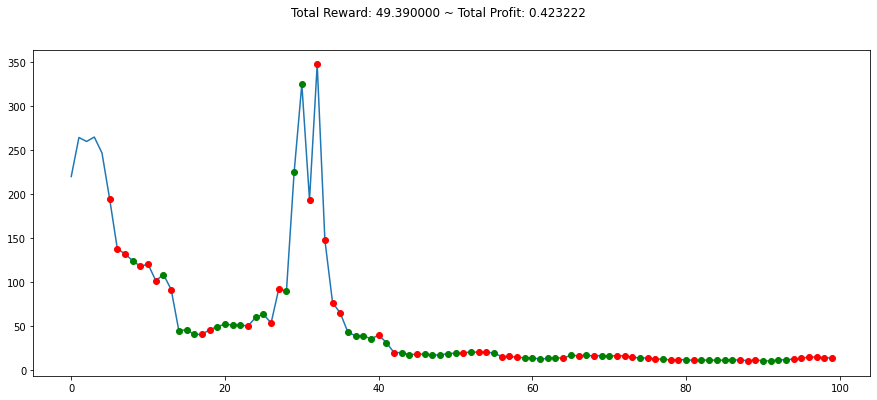

In [13]:
#instead of training we will take RANDOM actions to observe
#


state = env.reset() #allows to get our initial state
while True: # we are looping through eaach step and taking random actions
    action = env.action_space.sample() # .sample will take a random action and we are gonna save that action 
    n_state, reward, done, info = env.step(action) #saving that ramdom action and applying it to our environment
    if done: # when done break the loop and display the info
        print("info", info)
        break
        
plt.figure(figsize=(15,6)) #setting the frame size and displaying the result
plt.cla()
env.render_all() # render all the different trades into a plot
plt.show() # red dots are shorts and green dots are going long

# 3. Build Environment and Train

In [25]:
# making our environment to train it using A2C algorithm 
env_maker = lambda: gym.make('stocks-v0', df=df, frame_bound=(5,100), window_size=5) # lambda function is going to loop and create multiple environment if we need to
env = DummyVecEnv([env_maker]) #wrap our environment into a vectorised dummy environment to send it to stable_baseline 

In [26]:
# we are going to start training our RL agent
# basically means we are going to be using a deep neural network with LSTM layer. it allows our neural layer to keep context and learn about previous history in its neurons
# will take account what happened in the previous windows to account the future best action

model = A2C('MlpLstmPolicy', env, verbose=1) # then passing through the policy, in this case we are using a multi layer perceptron LSTM policy 
model.learn(total_timesteps=1000000) #start training

# explained varience value should be high (btw 0 and 1), means that model began to learn about all the diff varience in the data set and is now learning the pattern

---------------------------------
| explained_variance | 0.00179  |
| fps                | 13       |
| nupdates           | 1        |
| policy_entropy     | 0.686    |
| total_timesteps    | 5        |
| value_loss         | 108      |
---------------------------------
---------------------------------
| explained_variance | -0.00028 |
| fps                | 377      |
| nupdates           | 100      |
| policy_entropy     | 0.689    |
| total_timesteps    | 500      |
| value_loss         | 5.94e+03 |
---------------------------------
---------------------------------
| explained_variance | 0.0266   |
| fps                | 401      |
| nupdates           | 200      |
| policy_entropy     | 0.681    |
| total_timesteps    | 1000     |
| value_loss         | 0.0881   |
---------------------------------
---------------------------------
| explained_variance | -0.00495 |
| fps                | 366      |
| nupdates           | 300      |
| policy_entropy     | 0.68     |
| total_timest

KeyboardInterrupt: 

# 4. Evaluation and Result

In [36]:
env = gym.make('stocks-v0', df=df, frame_bound=(90,117), window_size=5)
obs = env.reset()
while True: 
    obs = obs[np.newaxis, ...]
    action, _states = model.predict(obs)
    obs, rewards, done, info = env.step(action)
    if done:
        print("info", info)
        break

info {'total_reward': 3.0199999999999996, 'total_profit': 1.338362290388335, 'position': 1}


In [37]:
env.prices

array([11.49, 11.86, 11.45, 10.91, 11.57, 10.75, 10.47, 11.73, 11.82,
       12.69, 13.45, 15.  , 14.91, 14.1 , 13.86, 13.91, 13.31, 13.83,
       12.25, 11.88, 11.8 , 12.02, 13.49,  9.36,  9.13,  9.46,  9.39,
        9.77, 10.2 , 10.35, 10.09, 10.02])

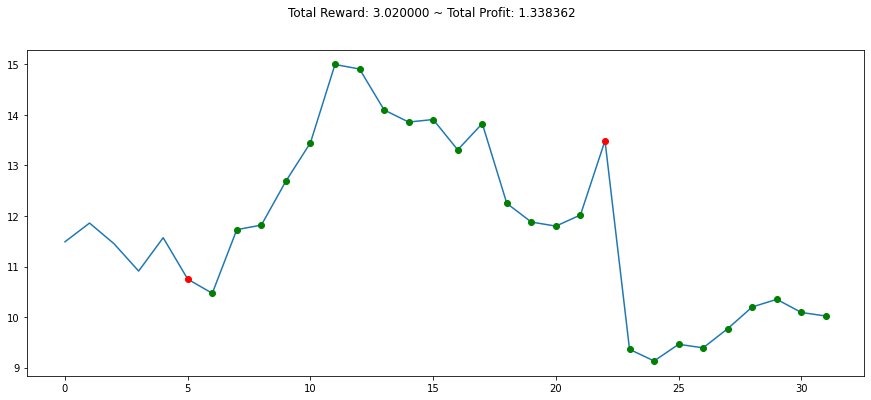

In [38]:
# we have made a 33% profit as we can use


plt.figure(figsize=(15,6)) # plot the data 
plt.cla()
env.render_all()
plt.show()

# Comments -

In [ ]:
# State Space
# Performance with different Policy
# Cell 66 Y - Axis and X - Axis  

# answers

# Y axis represents close price
#"Closing price" generally refers to the last price at which a stock trades during a regular trading session.
#state space S is a set of all the states that the agent can transition to and action space A is a set of all actions the agent can act out in a certain environment.

In [ ]:
#ref



# we are making a new environment 
# instead of taking random actions we are taking our model and predicting which action it should take


#env = gym.make('stocks-v0', df=df, frame_bound=(90,91), window_size=5) # frame bound some overlap is there
#obs = env.reset()
#while True: 
    #obs = obs[np.newaxis, ...] # we are re-shaping it using numpy to work with a non vectorised environment
    #action, _states = model.predict(obs) # passing it into model.predict func, taking what our current environment looks like and generating a prediction
    #obs, rewards, done, info = env.step(action) # we are getting our action and states and we are taking that to our environment to see the results
    #if done:  # break loop when done and display the information
       # print("info", info)
        #break